In [ ]:
! pip install bertopic
from bertopic import BERTopic
from umap import UMAP
import pandas as pd
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 15.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.1 MB/s eta 0:00:00
  Preparing metadata 

In [ ]:
all_text_clean = pd.read_excel("all_floyd_cleaned_final.xlsx")
dem_text_clean = pd.read_excel("dem_floyd_cleaned_final.xlsx")
rep_text_clean = pd.read_excel("rep_floyd_cleaned_final.xlsx")

In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=388)
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(all_text_clean['text_clean'].astype('str'))

In [ ]:
topic_model.update_topics(all_text_clean['text_clean'].astype('str'), n_gram_range=(1,2))

In [ ]:
# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,976,-1_justice_police_officer_murder,"[justice, police, officer, murder, black, toda...",[today breonna taylor birthday murder home peo...
1,0,360,0_peaceful_president_trump_military,"[peaceful, president, trump, military, gas, te...",[federal law enforcement officer fire rubber b...
2,1,265,1_right_peaceful_violence_loot,"[right, peaceful, violence, loot, riot, peacef...",[today people love mr world ask violence loot ...
3,2,160,2_black_racism_systemic_live,"[black, racism, systemic, live, systemic racis...",[live black brown america include subject raci...
4,3,86,3_taylor_breonna taylor_breonna_arbery,"[taylor, breonna taylor, breonna, arbery, ahma...","[breonna taylor ahmaud arbery families today, ..."
5,4,78,4_police_officer_brutality_police brutality,"[police, officer, brutality, police brutality,...",[happy police chiefs condemn police officer ki...
6,5,45,5_accountable_officer_hold accountable_officer...,"[accountable, officer, hold accountable, offic...",[single officer involve hold accountable murde...
7,6,44,6_police_reform_police reform_democrats,"[police, reform, police reform, democrats, leg...",[watch live congressional democrats introduce ...
8,7,43,7_minutes min_chauvin hold_hold knee_neck minutes,"[minutes min, chauvin hold, hold knee, neck mi...",[derek chauvin hold knee neck minutes min seco...
9,8,40,8_memorial_family_today_love,"[memorial, family, today, love, funeral, life,...",[weeks ago know day funeral see worldwide dema...


In [ ]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=10)

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
# Calculate Silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(probabilities, topics)
print(silhouette_avg)

0.2955422594939696


In [ ]:
# Visualize connections between topics using hierachical clustering
topic_model.visualize_hierarchy(top_n_topics=10)

In [ ]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]
# Save the predictions in the dataframe
all_text_clean['topic_prediction'] = topic_prediction
# Take a look at the data
all_text_clean.head()

,Unnamed: 0.1,Unnamed: 0,first_name,last_name,party,author_id,lang,id,created_at,text,text_no_url,text_no_username,text_no_symbol,text_no_hashtag,text_no_punct,text_no_number,text_lower,text_no_stopword,text_clean,topic_prediction
0,0,369,Kamala,Harris,D,803694179079458816,en,1265324956558163968,2020-05-26T16:52:32.000Z,We are fed up with Black lives being taken. Of...,We are fed up with Black lives being taken. Of...,We are fed up with Black lives being taken. Of...,We are fed up with Black lives being taken. Of...,We are fed up with Black lives being taken. Of...,We are fed up with Black lives being taken Off...,We are fed up with Black lives being taken Off...,we are fed up with black lives being taken off...,fed black lives taken officers held accountabl...,feed black live take officer hold accountable ...,4
1,1,15261,Justin,Amash,I,233842454,en,1265336582648847872,2020-05-26T17:38:44.000Z,George Floyd was murdered—callously and casual...,George Floyd was murdered—callously and casual...,George Floyd was murdered—callously and casual...,George Floyd was murdered callously and casual...,George Floyd was murdered callously and casual...,George Floyd was murdered callously and casual...,George Floyd was murdered callously and casual...,george floyd was murdered callously and casual...,murdered callously casually life meaning justice,murder callously casually life mean justice,-1
2,2,11407,Eric,Swalwell,D,942156122,en,1265347363331342080,2020-05-26T18:21:35.000Z,This is uncomfortable to watch. Which is why y...,This is uncomfortable to watch. Which is why y...,This is uncomfortable to watch. Which is why y...,This is uncomfortable to watch. Which is why y...,This is uncomfortable to watch. Which is why y...,This is uncomfortable to watch Which is why yo...,This is uncomfortable to watch Which is why yo...,this is uncomfortable to watch which is why yo...,uncomfortable watch watch defend officer right...,uncomfortable watch watch defend officer right...,-1
3,3,11406,Eric,Swalwell,D,942156122,en,1265350036835241984,2020-05-26T18:32:12.000Z,It should not matter what your political party...,It should not matter what your political party...,It should not matter what your political party...,It should not matter what your political party...,It should not matter what your political party...,It should not matter what your political party...,It should not matter what your political party...,it should not matter what your political party...,matter political party happened,matter political party happen,13
4,4,3319,Sherrod,Brown,D,43910797,en,1265358389208588032,2020-05-26T19:05:23.000Z,Demand #JusticeForFloyd. How many more Black l...,Demand #JusticeForFloyd. How many more Black l...,Demand #JusticeForFloyd. How many more Black l...,Demand #JusticeForFloyd. How many more Black l...,Demand. How many more Black lives must be take...,Demand How many more Black lives must be taken...,Demand How many more Black lives must be taken...,demand how many more black lives must be taken...,demand black lives taken end country systemic ...,demand black live take end country systemic in...,2


In [ ]:
# Subset the top 6 topics (Frequency > 50)
text_top_topics = all_text_clean.loc[all_text_clean['topic_prediction'].isin([0,1,2,3,4,5])]
# Frequency for each topic
top_topic_freq = text_top_topics['topic_prediction'].value_counts()
topic_freq = top_topic_freq.reset_index()
topic_freq.columns = ['Topic', 'Frequency']
topic_freq

,Topic,Frequency
0,0,360
1,1,265
2,2,160
3,3,86
4,4,78
5,5,45


<Axes: xlabel='Topic', ylabel='Frequency'>

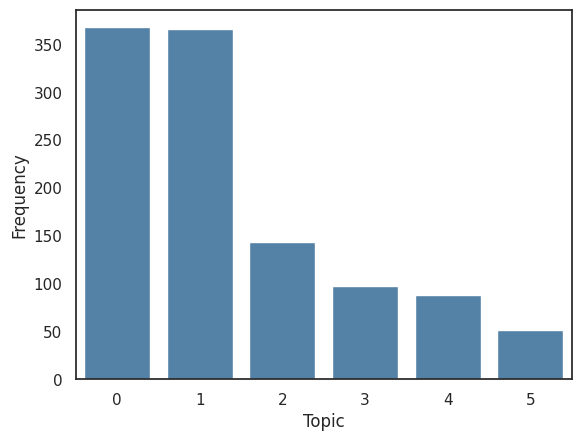

In [ ]:
import seaborn as sns
# plot with seaborn barplot
sns.set(font_scale=1)
sns.set_style("white")
sns.barplot(data=topic_freq, x='Topic', y='Frequency', color='steelblue')

In [ ]:
text_top_topics.groupby(['topic_prediction','party'])['topic_prediction'].count()

topic_prediction  party
0                 D        348
                  I          1
                  R         19
1                 D        161
                  I          2
                  R        203
2                 D        100
                  I          2
                  R         41
3                 D         90
                  R          8
4                 D         76
                  R         12
5                 D         40
                  I          1
                  R         11
Name: topic_prediction, dtype: int64

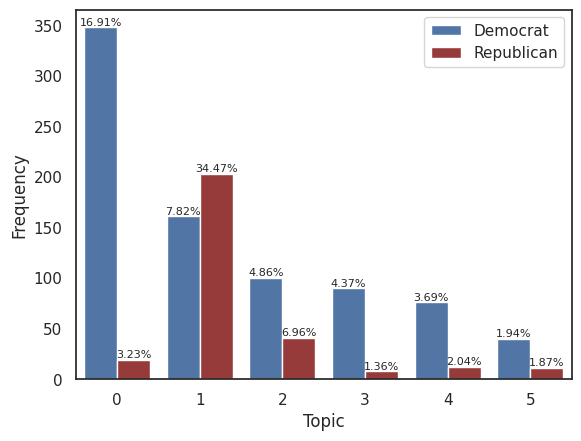

In [ ]:
import matplotlib.pyplot as plt
topic_count = pd.read_excel("topic_count.xlsx")
sns.set_palette(sns.color_palette(["#4374B3","#A62C2B"]))
ax = sns.barplot(x="Topic", y="Frequency", hue="Party", data=topic_count, ci=None)
for p,value in zip(ax.patches, topic_count['prop_party']):
    ax.annotate("{:.2%}".format(value), xy=(p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=8)
plt.legend(title="")

In [ ]:
# Run BERTopic model for Democrats
topics, probabilities = topic_model.fit_transform(dem_text_clean['text_clean'].astype('str'))
topic_model.visualize_barchart(top_n_topics=10)

In [ ]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]
# Save the predictions in the dataframe
dem_text_clean['topic_prediction'] = topic_prediction
text_top_topics = dem_text_clean.loc[dem_text_clean['topic_prediction'].isin([0,1,2,3,4,5,6,7,8,9])]
# Frequency for each topic
top_topic_freq = text_top_topics['topic_prediction'].value_counts()
topic_freq = top_topic_freq.reset_index()
topic_freq.columns = ['Topic', 'Frequency']
topic_freq

,Topic,Frequency
0,0,153
1,1,130
2,2,120
3,3,115
4,4,73
5,5,71
6,6,62
7,7,43
8,8,42
9,9,37


<Axes: xlabel='Topic', ylabel='Frequency'>

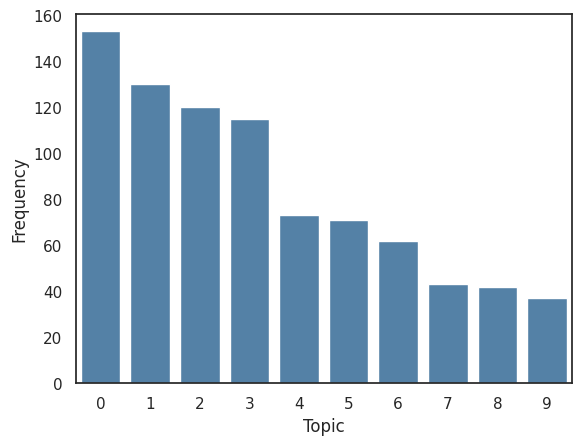

In [ ]:
# plot with seaborn barplot
sns.set(font_scale=1)
sns.set_style("white")
sns.barplot(data=topic_freq, x='Topic', y='Frequency', color='steelblue')

In [ ]:
# Run BERTopic model for Republicans
topics, probabilities = topic_model.fit_transform(rep_text_clean['text_clean'].astype('str'))
topic_model.visualize_barchart(top_n_topics=10)

In [ ]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]
# Save the predictions in the dataframe
rep_text_clean['topic_prediction'] = topic_prediction
text_top_topics = rep_text_clean.loc[rep_text_clean['topic_prediction'].isin([0,1,2,3,4,5,6,7,8,9])]
# Frequency for each topic
top_topic_freq = text_top_topics['topic_prediction'].value_counts()
topic_freq = top_topic_freq.reset_index()
topic_freq.columns = ['Topic', 'Frequency']
topic_freq

,Topic,Frequency
0,0,96
1,1,57
2,2,39
3,3,32
4,4,23
5,5,20
6,6,18
7,7,18
8,8,15
9,9,14


<Axes: xlabel='Topic', ylabel='Frequency'>

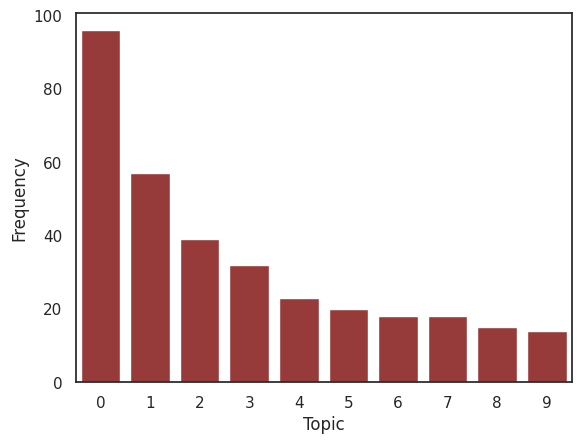

In [ ]:
# plot with seaborn barplot
sns.set(font_scale=1)
sns.set_style("white")
sns.barplot(data=topic_freq, x='Topic', y='Frequency', color='#A62C2B')